<a href="https://colab.research.google.com/github/Cohere-1B/TeamProject/blob/ssmith/Cohereteam1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
import pandas as pd
import os


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import pandas as pd
import os

#url = "https://docs.google.com/spreadsheets/d/1r9qTAWrgrN6YX2PFJ7pkOLpAIXfLeVVKOgrxfOQtdlg/edit?usp=sharing"
#df = pd.read_csv(url)

#check if the spreadsheet opened right
try:
  sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1r9qTAWrgrN6YX2PFJ7pkOLpAIXfLeVVKOgrxfOQtdlg/edit?usp=sharing")
  print("Spreadsheet opened properly", sh.title)
except Exception as e:
  print("Spreadsheet did not open correctly: {e}", sh.title)

#check if we can get data from our spreadsheet
try:
  rows = sh.get_all_values()
  print(rows)
except AttributeError as e:
  print("Data not accessed: {e}")


Spreadsheet opened properly Copy of AI Challenge Dataset
Data not accessed: {e}


In [ ]:
worksheet = sh.worksheet('AI Challenge Dataset')
rows = worksheet.get_all_values()
# print(rows)

df = pd.DataFrame.from_records(rows)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",FALSE,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks


In [ ]:
cols = list(df.columns)
print(cols)

df = df.rename(columns={0: 'brand_id', 1: 'review_id', 2: 'review_dating_by_category', 3: 'ai_aspect', 4: 'ai_sentiment', 5: 'avg_rating', 6: 'is_product_recommended', 7: 'review_content', 8: 'is_anonymous', 9: 'like_count', 10: 'display_name'})
new_cols = list(df.columns)
print(new_cols)

df = df.drop(axis=0, index=0)

df.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['brand_id', 'review_id', 'review_dating_by_category', 'ai_aspect', 'ai_sentiment', 'avg_rating', 'is_product_recommended', 'review_content', 'is_anonymous', 'like_count', 'display_name']


,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",FALSE,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [ ]:
### REVIEW DATING BY CATEGORY ###
modify_col = df['review_dating_by_category']

In [ ]:
### REVIEW CONTENT ###
review_content_col = df['review_content']

y = df['is_product_recommended']
X = df['review_content']

print(X.shape)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=1234)
X_train.head()

(2032,)
1    Basically, stick to the peanut butter ones. Th...
2    We do carry it, but we're currently out of sto...
3    We do carry Whims chocolate, but we haven’t or...
4    Very good. All the flavors are selling fast. I...
5    We still carry Whims, and it's selling well. A...
Name: review_content, dtype: object


,review_content
1842,Phreshly’s a very good product. We have not be...
1816,I've got a few customers that come in and they...
67,Little Saints is sold out for us right now. Ev...
93,"I only have a couple of kombucha brands, and I..."
1299,We actually have sold out at the moment. We pl...


In [ ]:
# 1. Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Print the first 50 items in the vocabulary
print("Vocabulary size {0}: ".format(len(tfidf_vectorizer.vocabulary_)))
print(str(list(tfidf_vectorizer.vocabulary_.items())[0:50])+'\n')

# 4. Transform *both* the training and test data using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 5. Print the matrix
print(X_train_tfidf.todense())

Vocabulary size 4032: 
[('phreshly', 2605), ('very', 3846), ('good', 1548), ('product', 2747), ('we', 3906), ('have', 1635), ('not', 2350), ('been', 369), ('selling', 3167), ('them', 3623), ('lately', 1958), ('it', 1851), ('kind', 1911), ('of', 2405), ('more', 2235), ('summertime', 3513), ('thing', 3631), ('here', 1665), ('re', 2843), ('golf', 1545), ('course', 875), ('so', 3312), ('seasonal', 3130), ('business', 522), ('just', 1882), ('don', 1079), ('think', 3633), ('lot', 2053), ('people', 2572), ('know', 1919), ('about', 70), ('the', 3620), ('in', 1758), ('market', 2113), ('enough', 1194), ('yet', 4012), ('aren', 239), ('familiar', 1298), ('with', 3969), ('brand', 466), ('ve', 3829), ('got', 1552), ('few', 1342), ('customers', 928), ('that', 3616), ('come', 736), ('and', 195), ('they', 3629), ('buying', 533), ('all', 158)]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 1. Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed training data
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# 2. Make predictions on the transformed test data using the predict_proba() method and
# save the values of the second column
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

# 3. Make predictions on the transformed test data using the predict() method
class_label_predictions = model.predict(X_test_tfidf)

# 4. Compute the Area Under the ROC curve (AUC) for the test data. Note that this time we are using one
# function 'roc_auc_score()' to compute the auc rather than using both 'roc_curve()' and 'auc()' as we have
# done in the past
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

# 5. Print out the size of the resulting feature space using the 'vocabulary_' attribute of the vectorizer
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

# 6. Get a glimpse of the features:
first_five = list(tfidf_vectorizer.vocabulary_.items())[0:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

#7. Graph the AUC ROC


AUC on the test data: 0.5983
The size of the feature space: 4032
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('phreshly', 2605), ('very', 3846), ('good', 1548), ('product', 2747), ('we', 3906)]:


In [ ]:
print('Review #1:\n')
print(X_test.to_numpy()[496])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[496]))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[496]))

Review #1:

We've always done well with Cult and we've been carrying them since we opened three years ago, and we are still doing well with it. We are still ordering it, so, we are doing well. I have never tasted them since I don't really eat packaged food but I think we are all good.

Prediction: Is this a good review? TRUE

Actual: Is this a good review? TRUE



Sophie- Currently working on splitting the review_dating_category, afterwards I plan on cleaning the data further by deleting any missing values, remove duplicates, and fill in missing ratings with median value.
Additionally I plan to incorporate our "clean data" into divya's tfidf and logistic regression object.

In [ ]:
#Drop Missing Values
#1. drop rows with missing values
df = df.dropna()

#2. drop rows where all values are missing
df = df.dropna(how='all')

#3. drop columns with missing values
df = df.dropna(axis=1)

#4. drop columns where all values are missing
df = df.dropna(axis=1, how='all')

#5. print new data
df.head()
#df.head()
#Fill Missing Values
#1.

,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",FALSE,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [ ]:
# Check the first few rows of the 'review_dating_by_category' column to inspect the data
df['review_dating_by_category'].head(10)


,review_dating_by_category
1,"[{""id"":9946,""review_id"":2598,""rating_score"":5,..."
2,"[{""id"":15114,""review_id"":3718,""rating_score"":5..."
3,"[{""id"":15125,""review_id"":3719,""rating_score"":4..."
4,"[{""id"":7561,""review_id"":2004,""rating_score"":5,..."
5,"[{""id"":15113,""review_id"":3717,""rating_score"":4..."
6,"[{""id"":15105,""review_id"":3716,""rating_score"":4..."
7,"[{""id"":12076,""review_id"":3131,""rating_score"":5..."
8,"[{""id"":9971,""review_id"":2604,""rating_score"":5,..."
9,"[{""id"":9966,""review_id"":2603,""rating_score"":5,..."
10,"[{""id"":9956,""review_id"":2601,""rating_score"":5,..."


In [ ]:
#import pandas as pd
#import json

# Assume df is your original DataFrame


# Step 1: Explode the list of dictionaries into separate rows
#df_exploded = df.explode('review_dating_by_category').reset_index(drop=True)

# Step 2: Check the data type and content in the column after exploding
#print(df_exploded['review_dating_by_category'].head(10))  # Print the first 10 rows
#print(type(df_exploded['review_dating_by_category'].iloc[0]))  # Check the type of the first row

# Step 3: If the data is in string format, convert it to dictionaries using json.loads
#if isinstance(df_exploded['review_dating_by_category'].iloc[0], str):
#    df_exploded['review_dating_by_category'] = df_exploded['review_dating_by_category'].apply(json.loads)

# Step 4: Filter out any rows where 'review_dating_by_category' is not a dictionary
#df_filtered = df_exploded[df_exploded['review_dating_by_category'].apply(lambda x: isinstance(x, dict))]

# Step 5: Normalize the filtered data (only valid dictionaries)
#df_normalized = pd.json_normalize(df_filtered['review_dating_by_category'])

# Display the normalized DataFrame
#print(df_normalized)
#df_normalized



import pandas as pd
import json

# Assume df is your original DataFrame
df_sub = df[['review_dating_by_category']]

# Step 1: Convert the string JSON objects in 'review_dating_by_category' to dictionaries
df_sub['review_dating_by_category'] = df_sub['review_dating_by_category'].apply(json.loads)

# Step 2: Explode the list of dictionaries into separate rows
df_exploded = df_sub.explode('review_dating_by_category').reset_index(drop=True)

# Step 3: Normalize the exploded data to create columns for 'id', 'review_id', 'rating_score', and 'rating_category'
df_normalized = pd.json_normalize(df_exploded['review_dating_by_category'])

# Step 4: Create a new DataFrame with the specified column names
df_final = df_normalized[['id', 'review_id', 'rating_score', 'rating_category']]

# Display the final DataFrame
df_final.head()


<ipython-input-13-6ccd06992a66>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['review_dating_by_category'] = df_sub['review_dating_by_category'].apply(json.loads)


,id,review_id,rating_score,rating_category
0,9946,2598,5.0,rating_shipping
1,9945,2598,5.0,rating_service
2,9947,2598,5.0,rating_price
3,9944,2598,5.0,rating_quality
4,15114,3718,5.0,rating_packaging


Suggestion #1 - Sophie


*   Each of the items in rating_category have their own column
*   df_final has the same amount of rows as our original df
* each row keeps the 'id' column and the 'review_id' column even though some 'id' values are tied to the same 'review_id'
* all NaN/null values are replaced with a 0



In [ ]:
# Pivot the DataFrame so that each row's rating_category becomes a separate column
df_pivot_each = df_final.pivot(index=['id', 'review_id'], columns='rating_category', values='rating_score').reset_index()

# Replace NaN with 0
df_pivot_each.fillna(0, inplace=True)

# Display the modified DataFrame where NaN values are replaced with 0
df_pivot_each.head()


rating_category,id,review_id,rating_packaging,rating_price,rating_quality,rating_service,rating_shipping,rating_taste
0,6192,1547,5.0,0.0,0.0,0.0,0.0,0.0
1,6193,1547,0.0,5.0,0.0,0.0,0.0,0.0
2,6194,1547,0.0,0.0,5.0,0.0,0.0,0.0
3,6195,1547,0.0,0.0,0.0,5.0,0.0,0.0
4,6196,1547,0.0,0.0,0.0,0.0,5.0,0.0


Suggestion #2 - Sophie

*   drops 'id' category and ties all 'id' values to associated 'review_id'
*   all NaN values are replaced with a 0
* this df will be smaller than the original df, but will retain all necesary information



In [ ]:
# Pivot the DataFrame by 'review_id' so that each unique review_id has all rating_categories as columns
df_pivot_by_review_id = df_final.pivot_table(index='review_id', columns='rating_category', values='rating_score', aggfunc='first').reset_index()

# Replace NaN with 0
df_pivot_by_review_id.fillna(0, inplace=True)

# Display the modified DataFrame with NaN values replaced by 0
df_pivot_by_review_id.head()


rating_category,review_id,rating_packaging,rating_price,rating_quality,rating_service,rating_shipping,rating_taste
0,1547,5.0,5.0,5.0,5.0,5.0,5.0
1,1548,4.0,3.0,3.0,4.0,4.0,3.0
2,1549,4.0,4.0,4.0,4.0,4.0,4.0
3,1550,4.0,4.0,4.0,4.0,4.0,4.0
4,1551,4.0,4.0,4.0,4.0,4.0,4.0


**Exploratory Data Analysis (EDA) by Sophie**


*  Visualize patterns, trends, and anamolies in the data
*   analyze distrubition of key sentiments
* I will have two parts of EDA
1. Suggestion 1 EDA
2. Suggestion 2 EDA




Suggestion 1: by Sophie
*  each row keeps the 'id' column and the 'review_id' column even though some 'id' values are tied to the same 'review_id'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9046 entries, 0 to 9045
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9046 non-null   int64  
 1   review_id         9046 non-null   int64  
 2   rating_packaging  9046 non-null   float64
 3   rating_price      9046 non-null   float64
 4   rating_quality    9046 non-null   float64
 5   rating_service    9046 non-null   float64
 6   rating_shipping   9046 non-null   float64
 7   rating_taste      9046 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 565.5 KB
None
rating_category
id                  0
review_id           0
rating_packaging    0
rating_price        0
rating_quality      0
rating_service      0
rating_shipping     0
rating_taste        0
dtype: int64
0


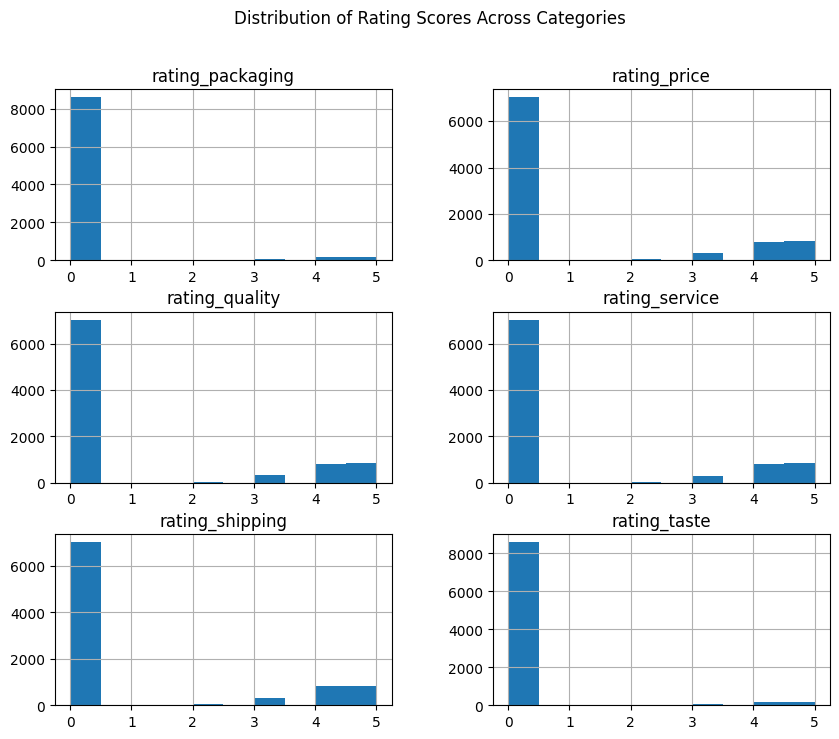

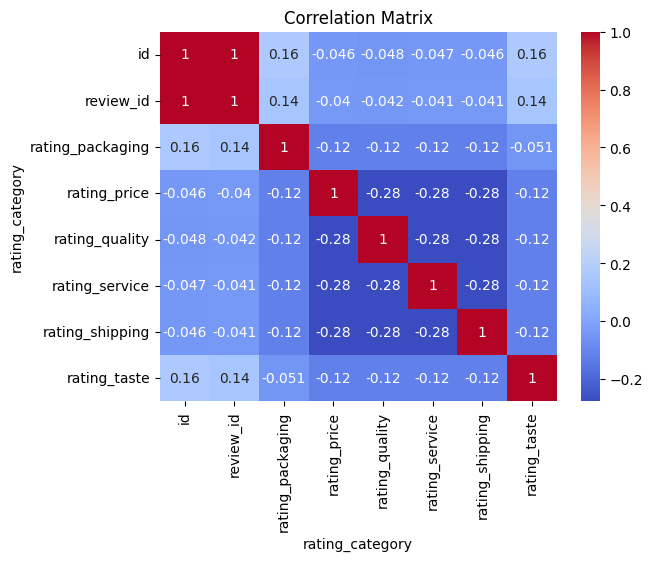

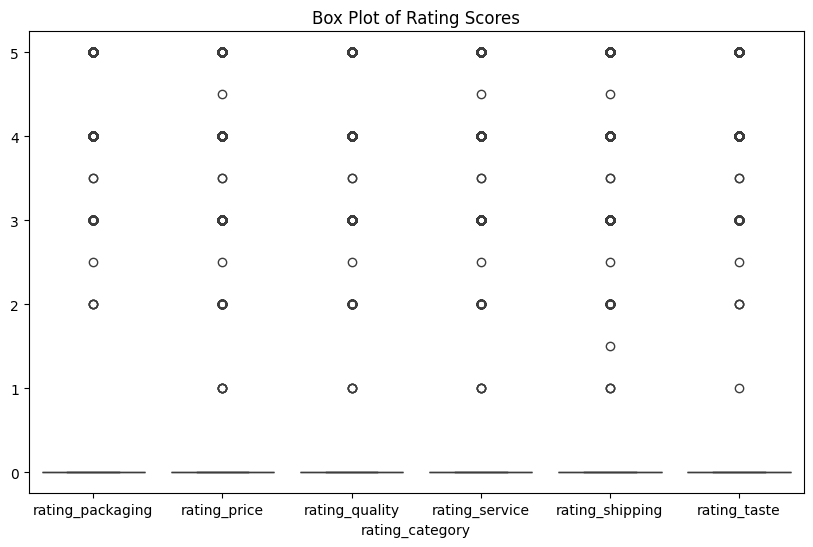

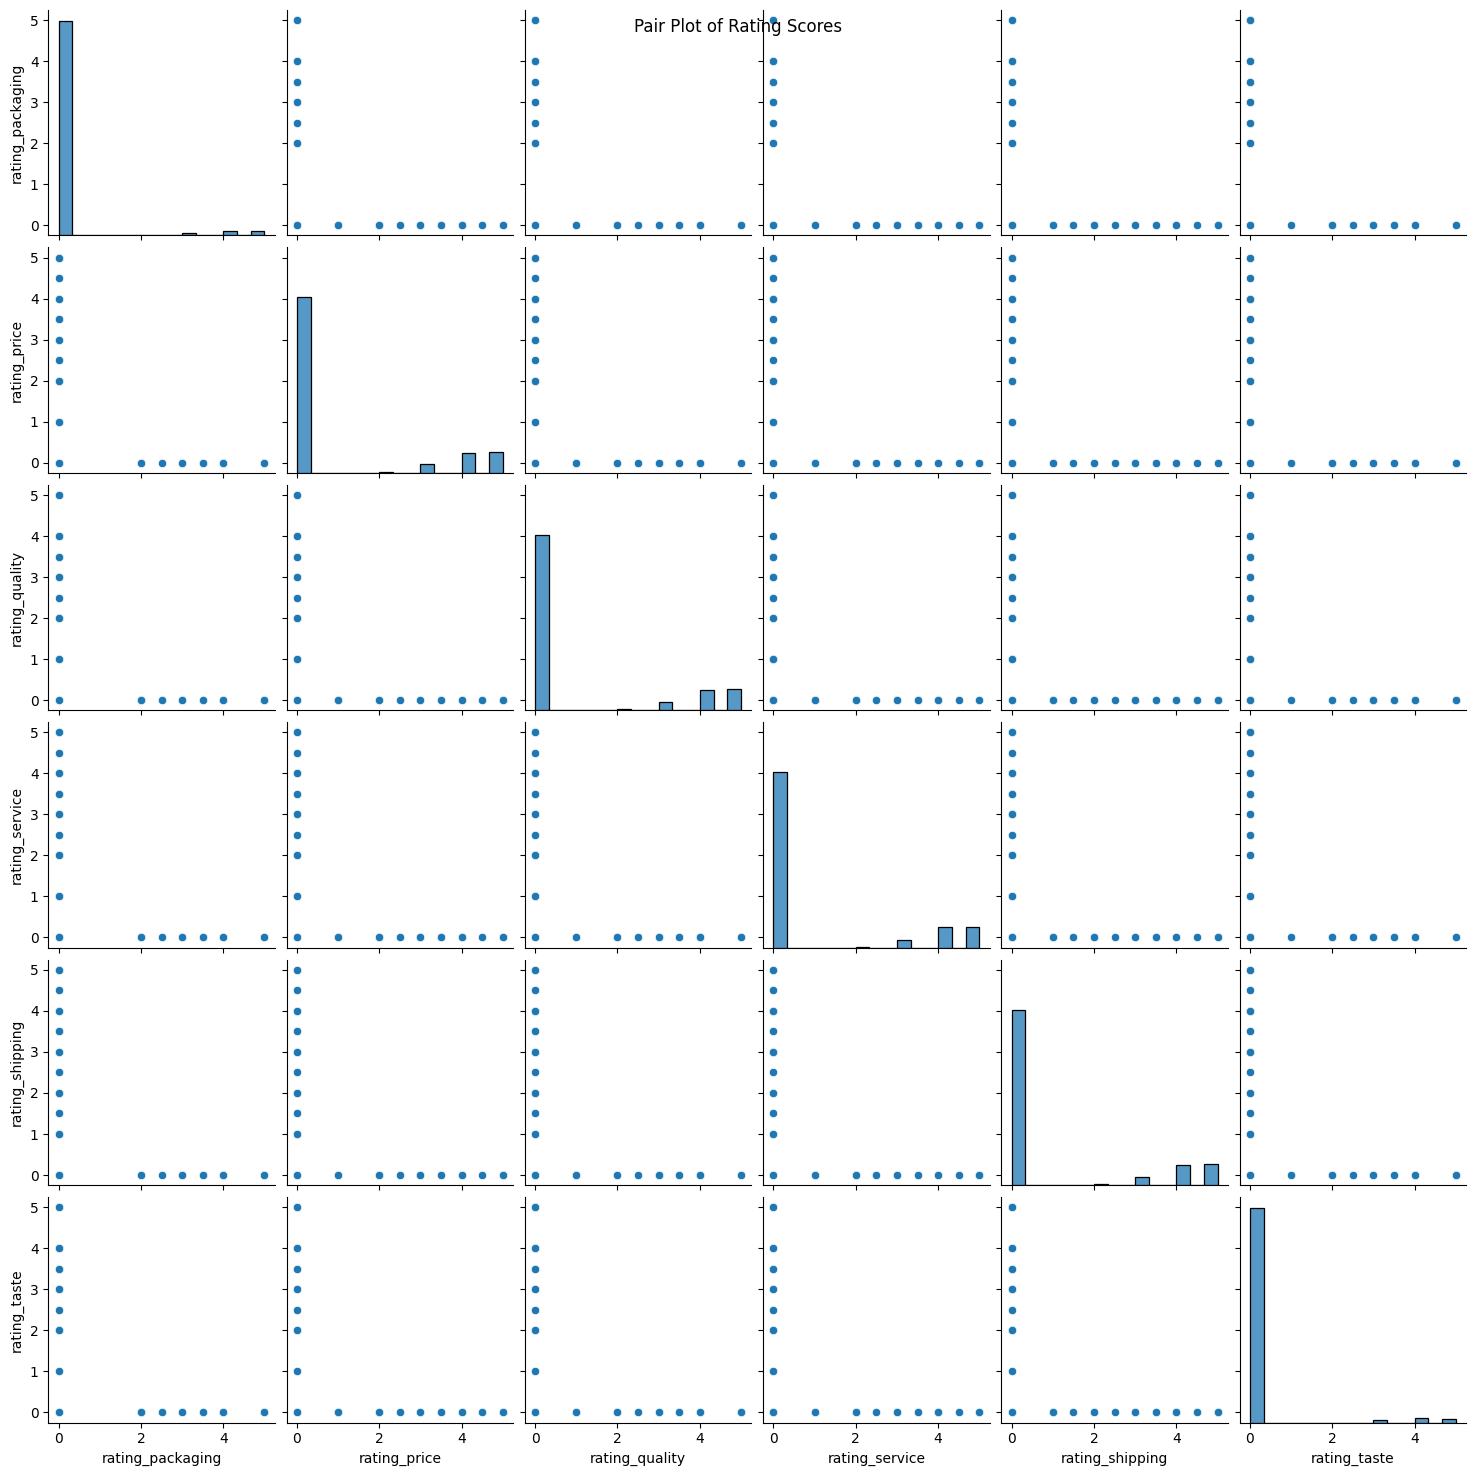

rating_category       id  rating_packaging  rating_price  rating_quality  \
review_id                                                                  
1547              6194.5          0.833333      0.833333        0.833333   
1548              6200.5          0.666667      0.500000        0.500000   
1549              6206.5          0.666667      0.666667        0.666667   
1550              6212.5          0.666667      0.666667        0.666667   
1551              6218.5          0.666667      0.666667        0.666667   
...                  ...               ...           ...             ...   
3744             15272.5          0.666667      0.666667        0.666667   
3745             15278.5          0.500000      0.500000        0.500000   
3746             15284.5          0.666667      0.666667        0.666667   
3747             15290.5          0.583333      0.583333        0.583333   
3748             15296.5          0.833333      0.833333        0.833333   

rating_cate

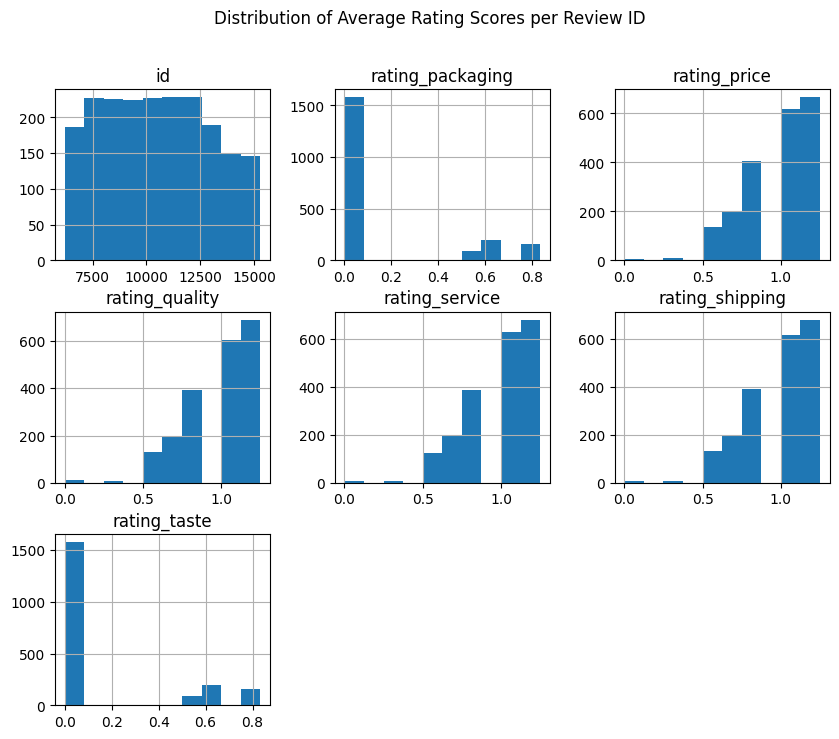

rating_category
rating_packaging    0.848369
rating_price        3.196829
rating_quality      3.225751
rating_service      3.229338
rating_shipping     3.216566
rating_taste        0.848083
dtype: float64


rating_category,id,review_id,rating_packaging,rating_price,rating_quality,rating_service,rating_shipping,rating_taste
0,6192,1547,5.0,0.0,0.0,0.0,0.0,0.0
1,6193,1547,0.0,5.0,0.0,0.0,0.0,0.0
2,6194,1547,0.0,0.0,5.0,0.0,0.0,0.0
3,6195,1547,0.0,0.0,0.0,5.0,0.0,0.0
4,6196,1547,0.0,0.0,0.0,0.0,5.0,0.0


In [ ]:
#Exploratory Data Analysis (EDA) by Sophie - Suggestion 1
import seaborn as sns
import matplotlib.pyplot as plt


#check for data types
print(df_pivot_each.info())

#summary of stats
df_pivot_each.describe()

#check for missing values
print(df_pivot_each.isnull().sum())

#check for duplicates
print(df_pivot_each.duplicated().sum())

#plot histograms for each rating category
df_pivot_each[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']].hist(figsize=(10, 8), bins=10)
plt.suptitle('Distribution of Rating Scores Across Categories')
plt.show()

#let's perform correlation analysis
corr_matrix = df_pivot_each.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#let's show some outliers by using a plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pivot_each[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']])
plt.title('Box Plot of Rating Scores')
plt.show()

#pairplot to show relationship
sns.pairplot(df_pivot_each[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']])
plt.suptitle('Pair Plot of Rating Scores')
plt.show()

#group by review id to see average rating
avg_rating_by_review = df_pivot_each.groupby('review_id').mean()
print(avg_rating_by_review)
#plot the distribution of average ratings
avg_rating_by_review.hist(figsize=(10, 8), bins=10)
plt.suptitle('Distribution of Average Rating Scores per Review ID')
plt.show()

#understand variance across the categories
variance_by_category = df_pivot_each[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']].var()
print(variance_by_category)

#remove duplicates and fill in ratings with the median value (this needs work)
df_pivot_each_no_duplicates = df_pivot_each.drop_duplicates(subset=['id', 'review_id'], keep = 'first')
rating_columns = ['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']
df_pivot_each_no_duplicates[rating_columns] = df_pivot_each_no_duplicates[rating_columns].apply(lambda x: x.fillna(x.median()))
df_pivot_each_no_duplicates.head()

After cleaning the data and performing EDA, now we will begin Model Selection

Task: Model Selection and Training 1
 Implement word embeddings (e.g., Word2Vec, GloVe) and extract meaningful features such as sentiment scores and key phrases

Suggestion 2: by Sophie
* drops 'id' category and ties all 'id' values to associated 'review_id'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         2032 non-null   int64  
 1   rating_packaging  2032 non-null   float64
 2   rating_price      2032 non-null   float64
 3   rating_quality    2032 non-null   float64
 4   rating_service    2032 non-null   float64
 5   rating_shipping   2032 non-null   float64
 6   rating_taste      2032 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 111.2 KB
None
rating_category
review_id           0
rating_packaging    0
rating_price        0
rating_quality      0
rating_service      0
rating_shipping     0
rating_taste        0
dtype: int64
0


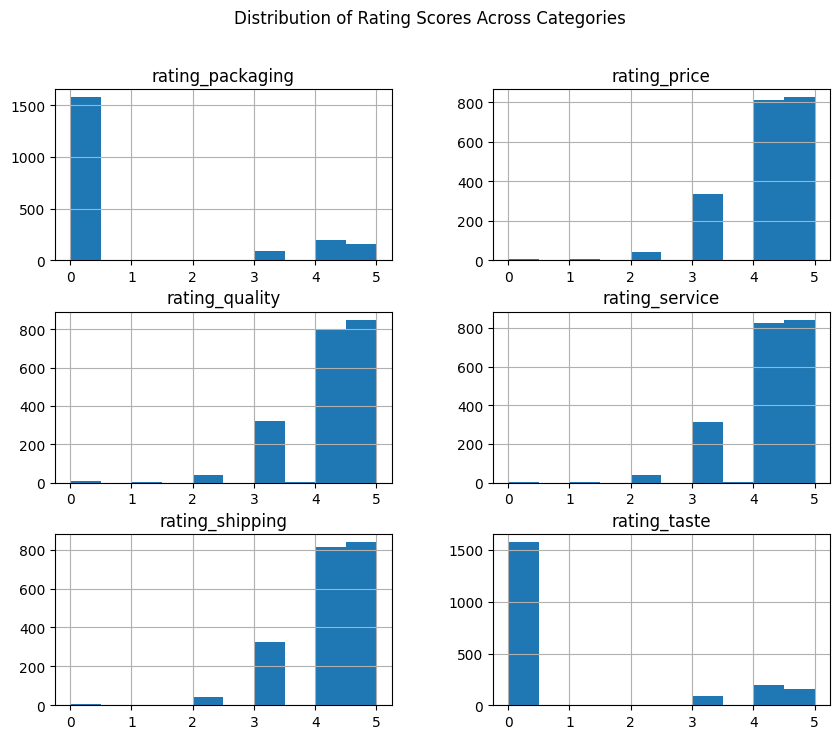

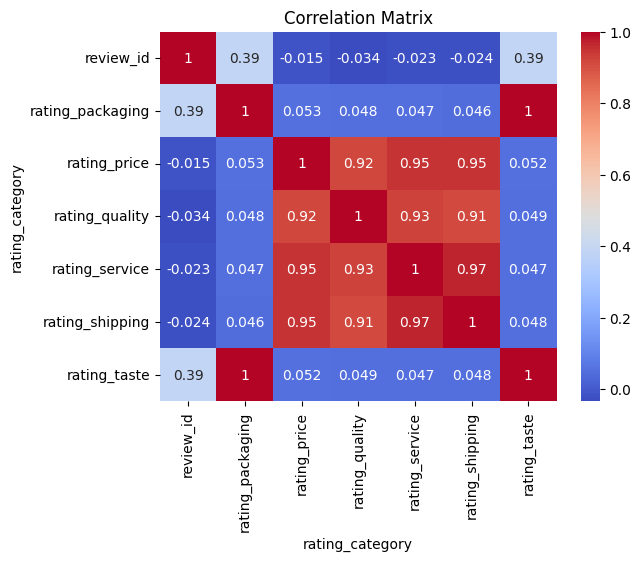

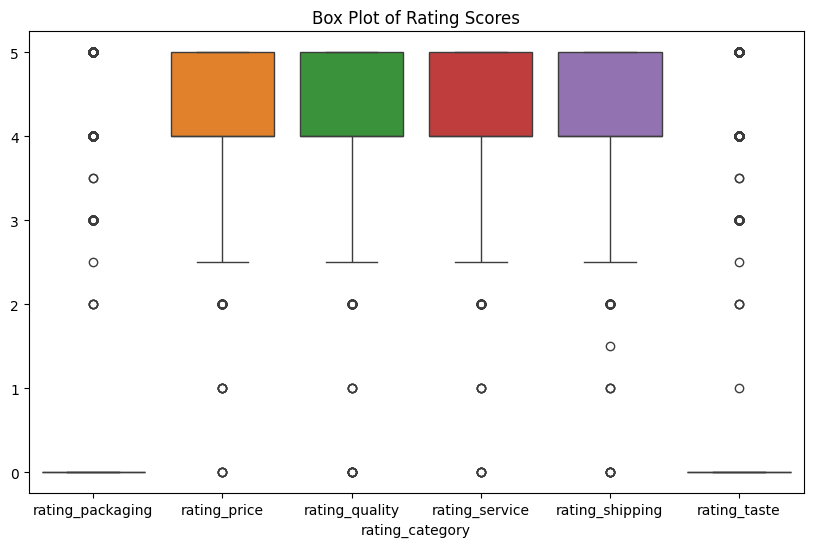

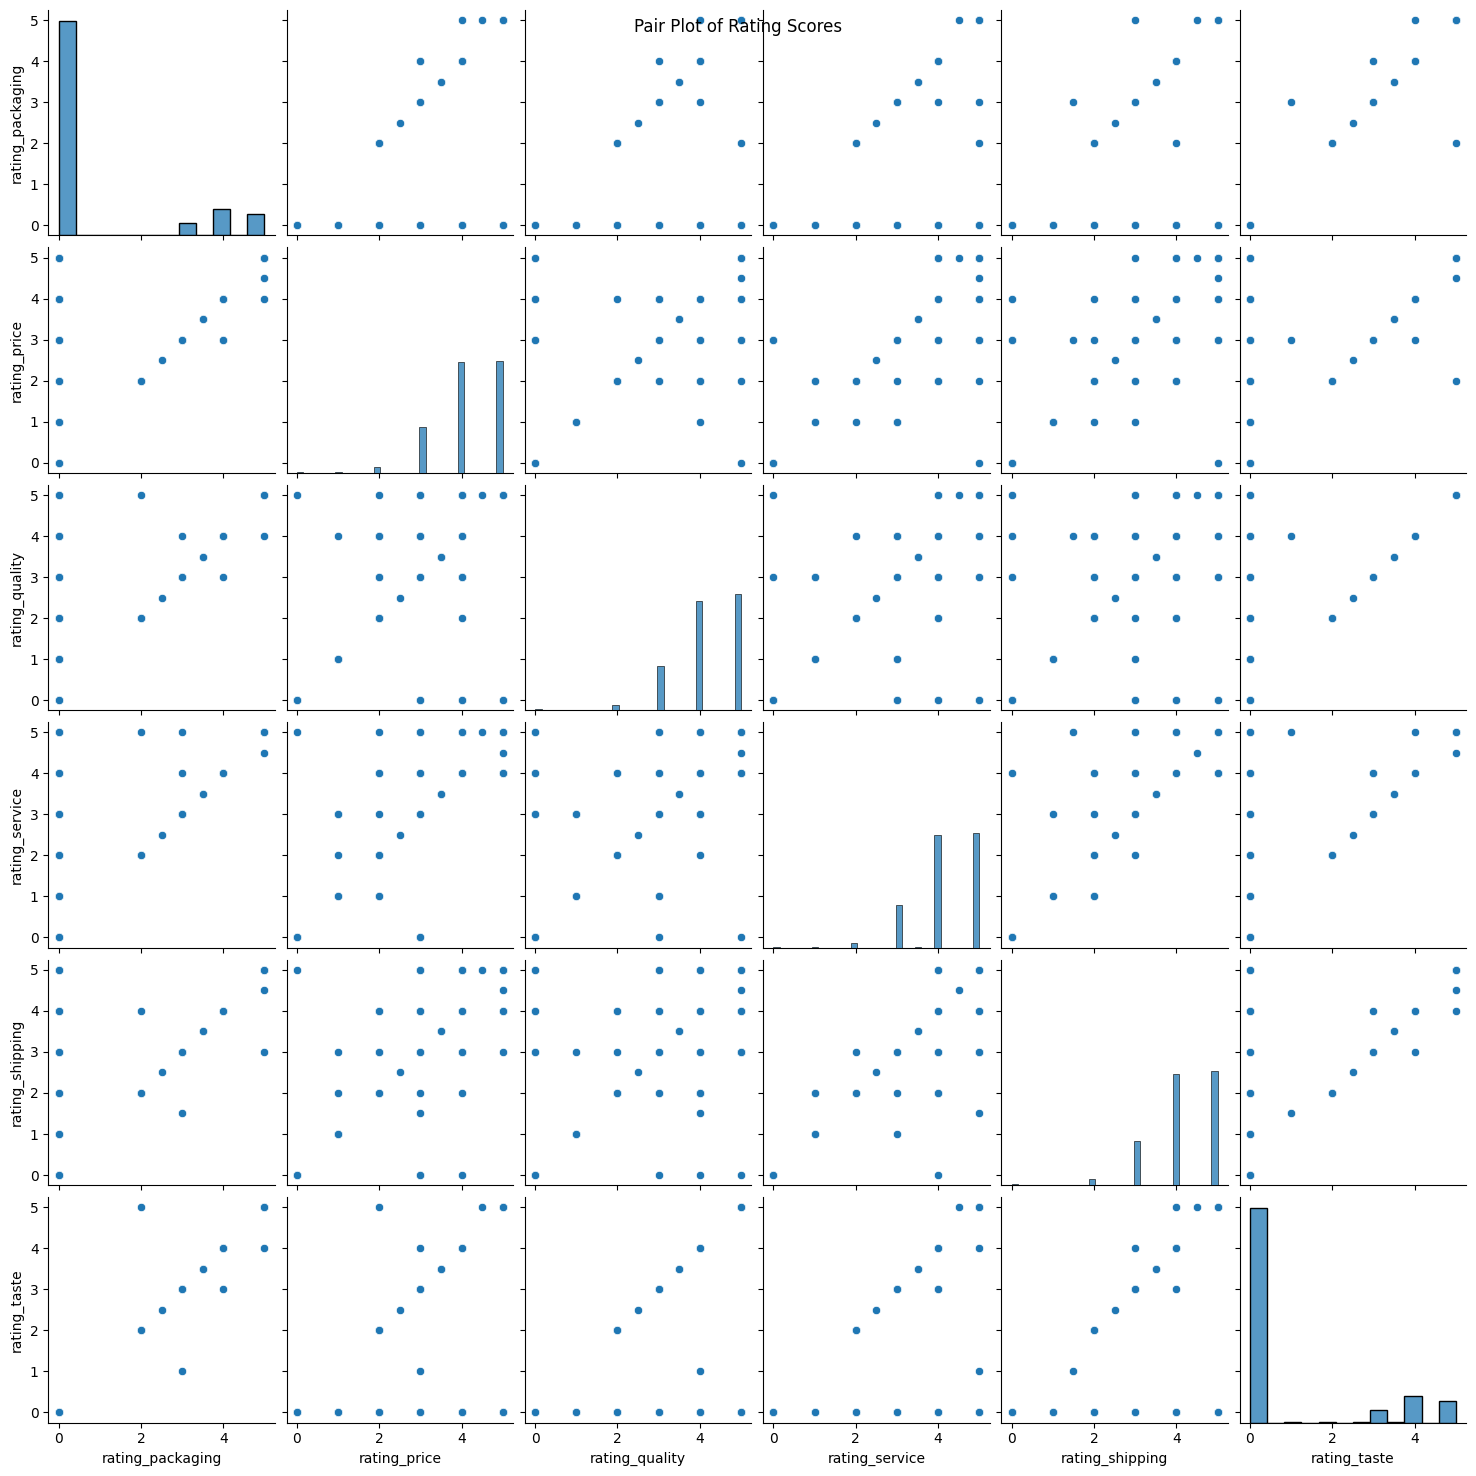

rating_category  rating_packaging  rating_price  rating_quality  \
review_id                                                         
1547                          5.0           5.0             5.0   
1548                          4.0           3.0             3.0   
1549                          4.0           4.0             4.0   
1550                          4.0           4.0             4.0   
1551                          4.0           4.0             4.0   
...                           ...           ...             ...   
3744                          4.0           4.0             4.0   
3745                          3.0           3.0             3.0   
3746                          4.0           4.0             4.0   
3747                          3.5           3.5             3.5   
3748                          5.0           5.0             5.0   

rating_category  rating_service  rating_shipping  rating_taste  
review_id                                                      

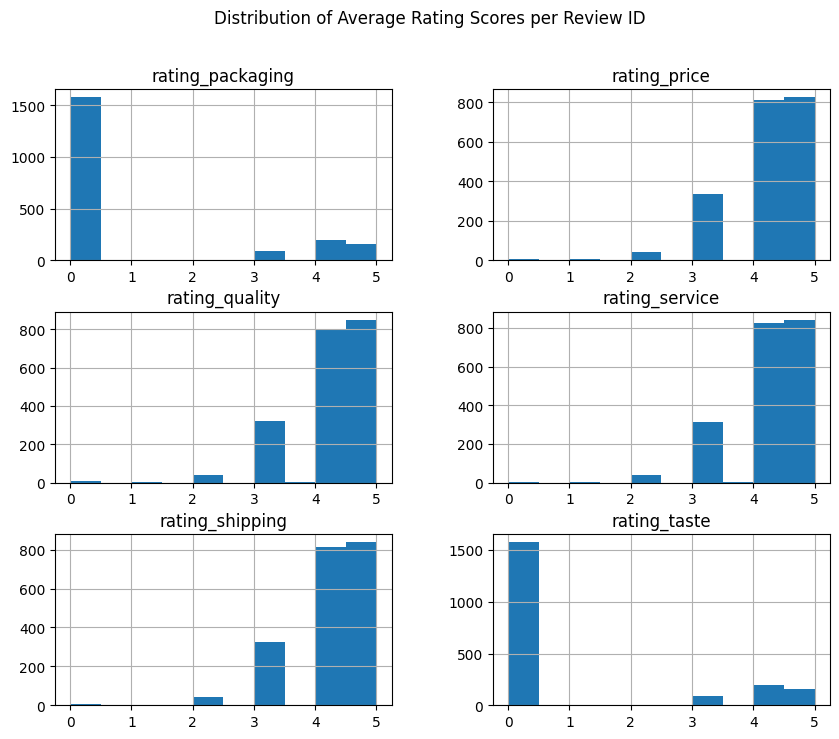

rating_category
rating_packaging    3.100393
rating_price        0.690234
rating_quality      0.715189
rating_service      0.668665
rating_shipping     0.690287
rating_taste        3.099828
dtype: float64


In [ ]:
#Exploratory Data Analysis (EDA) by Sophie - Suggestion 2

import seaborn as sns
import matplotlib.pyplot as plt

#check for data types
print(df_pivot_by_review_id.info())

#summary of stats
df_pivot_by_review_id.describe()

#check for missing values
print(df_pivot_by_review_id.isnull().sum())

#check for duplicates
print(df_pivot_by_review_id.duplicated().sum())

#plot histograms for each rating category
df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']].hist(figsize=(10, 8), bins=10)
plt.suptitle('Distribution of Rating Scores Across Categories')
plt.show()

#let's perform correlation analysis
corr_matrix_two = df_pivot_by_review_id.corr()
sns.heatmap(corr_matrix_two, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#let's show some outliers by using a plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']])
plt.title('Box Plot of Rating Scores')
plt.show()

#pairplot to show relationship
sns.pairplot(df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']])
plt.suptitle('Pair Plot of Rating Scores')
plt.show()

#group by review id to see average rating
avg_rating_by_review_two = df_pivot_by_review_id.groupby('review_id').mean()
print(avg_rating_by_review_two)
#plot the distribution of average ratings
avg_rating_by_review_two.hist(figsize=(10, 8), bins=10)
plt.suptitle('Distribution of Average Rating Scores per Review ID')
plt.show()

#understand variance across the categories
variance_by_category_two = df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']].var()
print(variance_by_category_two)

In [ ]:
!git clone https://github.com/Cohere-1B/TeamProject.git

Cloning into 'TeamProject'...
fatal: could not read Username for 'https://github.com': No such device or address
